# Customer Segmentation Analysis with K-Means and DBSCAN

In [141]:
#Standard operational package imports
import pandas as pd
import numpy as np

#Important imports for modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [142]:
#read file
df = pd.read_csv('Mall_Customers.csv')

In [143]:
#Display the first rows of the dataset
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [144]:
df.shape

(200, 5)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [146]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

# Visualizations

### Pie Chart

This plot shows the gender distribution across the data

Text(0.5, 1.0, 'Gender Distribution')

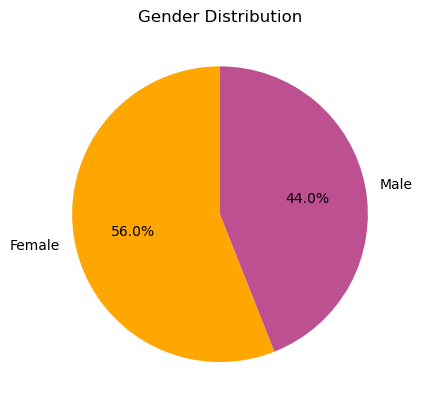

In [147]:
gender = df['Gender'].value_counts()
colors = ['#ffa600', '#bc5090']

plt.pie(gender, labels = gender.index, autopct='%1.1f%%', startangle = 90, colors = colors)
plt.title('Gender Distribution')

### Histograms

Histograms show the distribution of continuous data as bars.

C:\Users\danyv\AppData\Local\Temp\ipykernel_28656\1221694321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins = 20)
C:\Users\danyv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

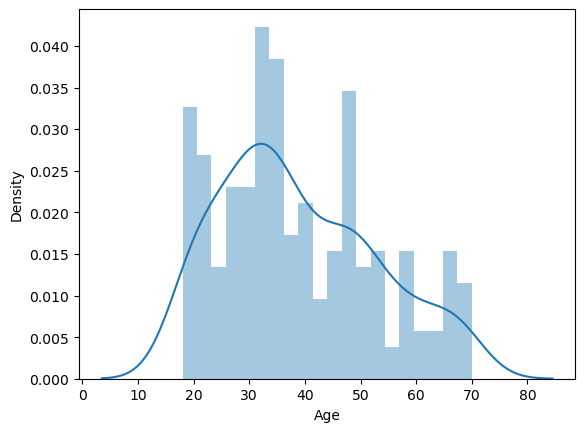

In [148]:
sns.distplot(df['Age'], bins = 20)

C:\Users\danyv\AppData\Local\Temp\ipykernel_28656\602663931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'], bins = 20)
C:\Users\danyv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

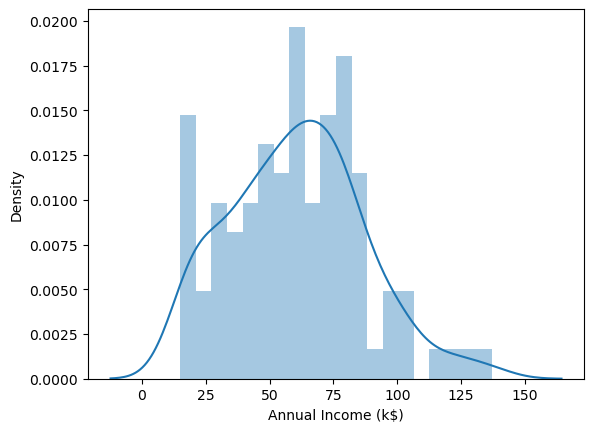

In [149]:
sns.distplot(df['Annual Income (k$)'], bins = 20)

C:\Users\danyv\AppData\Local\Temp\ipykernel_28656\4217091307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'], bins = 20)
C:\Users\danyv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

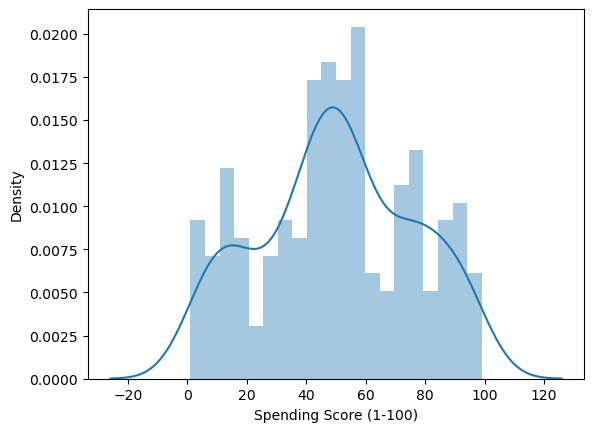

In [150]:
sns.distplot(df['Spending Score (1-100)'], bins = 20)

# Modeling

## K-Means Clustering

In [152]:
#For modeling purposes we need only numerical values
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

### 1 - Age vs Spending Score

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

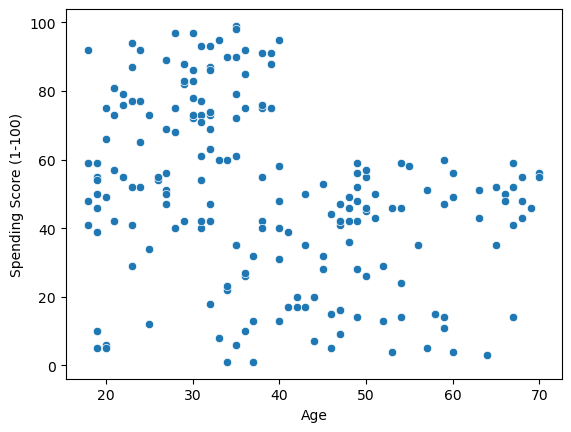

In [155]:
age_spending = df[['Age', 'Spending Score (1-100)']]

sns.scatterplot(age_spending, x = 'Age', y = 'Spending Score (1-100)')

In [175]:
# Elbow method
k_range = range(1, 10)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(age_spending)
    inertia.append(kmeans.inertia_)


C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\danyv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danyv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Inertia')

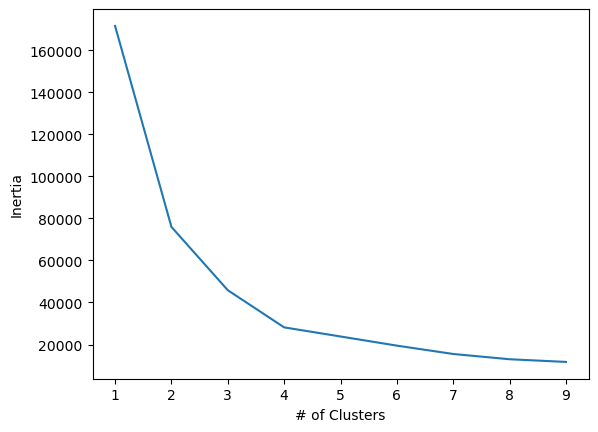

In [176]:
# Elbow Plot
sns.lineplot(x = k_range, y = inertia)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

**Optimal N. of Clusters = 4**

*Let's see the Silhouette score for K=4*

In [178]:
kmeans4 = KMeans(n_clusters = 4, random_state = 42).fit(age_spending)
print('Silhouette Score: ', silhouette_score(age_spending, kmeans4.labels_))

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score:  0.49973941540141753


**Silhouette Score: 0.49**

In [181]:
preds_4 = kmeans_4.predict(age_spending)

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

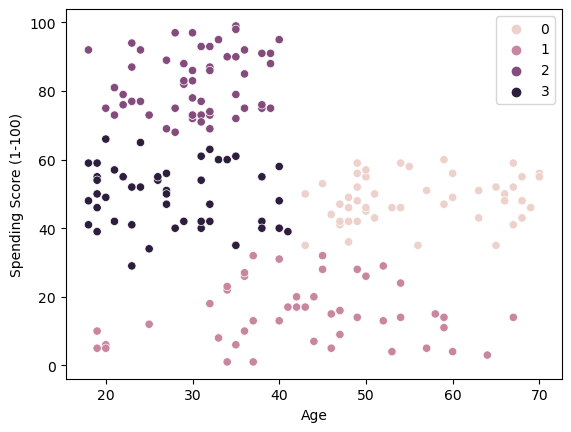

In [193]:
#Let's visualize the value with a scatterplot

sns.scatterplot(age_spending, x = df['Age'], y = df['Spending Score (1-100)'], hue = preds_4)


Among the dataset formed of Age and Spending Score, we observe:
- **Group 0**, has an age of 43-70, with a spending score ranging from 30 to 65. (**Average Adult Buyers 2**)
- **Group 1**, has an age of 20 - 68, with a low spending score between 5 and 30. (**Savings-Conscious Buyers**)
- **Group 2**, has an age of 20 - 38, with a high spending score between 70 to 100. (**Target Buyers**)
- **Group 3**, has an age of 20 - 38, with a spending score ranging from 35 to 63. (**Average Adult Buyers 1**)

### 2 - Age vs Annual Income

In [183]:
# Let's take the data we need
age_income = df[['Age', 'Annual Income (k$)']]
age_income.head()

Age  Annual Income (k$)
0   19                  15
1   21                  15
2   20                  16
3   23                  16
4   31                  17

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

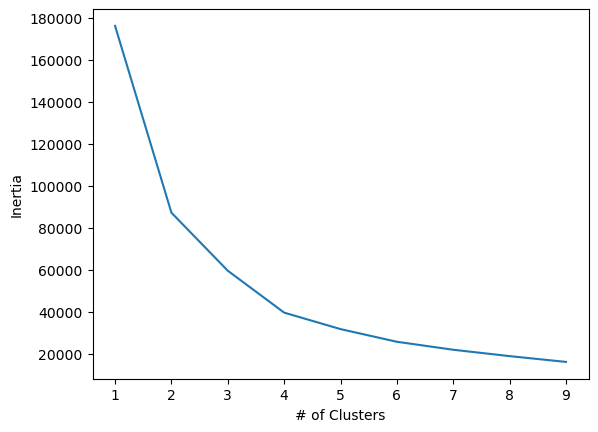

In [184]:
# Elbow method
k_range = range(1, 10)
inertia = []


for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(age_income)
    inertia.append(kmeans.inertia_)

# Elbow Plot
sns.lineplot(x = k_range, y = inertia)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

**Optimal N. of Cluster = 4**

In [194]:
kmeans_age_income = KMeans(n_clusters = 4, random_state = 42).fit(age_income)
preds_age_income = kmeans_age_income.predict(age_income)

print('Silhouette Score: ', silhouette_score(age_income, kmeans_age_income.labels_))

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score:  0.43295184273333076


**Silhouette Score:  0.43**

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

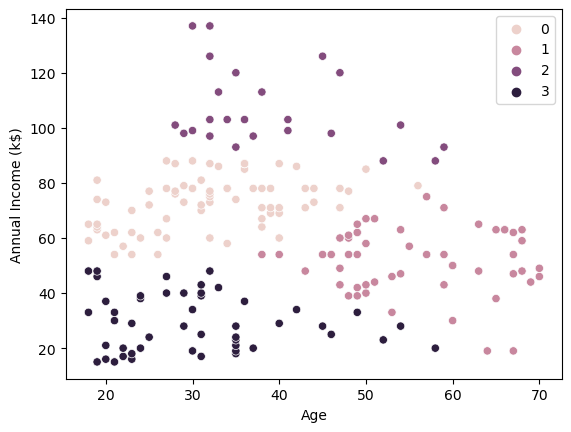

In [195]:
sns.scatterplot(age_spending, x = df['Age'], y = df['Annual Income (k$)'], hue = preds_age_income)

Among the dataset formed of Age and Annual Income, we observe:
- **Group 0**: has an age of 20 - 50, with an Annual Income ranging from 58 to 90k. (**Good Income Buyers 2**)
- **Group 1**, has an age of 45 - 70, with an Annual Income ranging from 45 to 78k. (**Good Income Buyers 1**)
- **Group 2**, has an age of 27 - 60, with an Annual Income ranging from 90 to 140k. (**Target Persona**)
- **Group 3**, has an age of 20 - 58, with an Annual Income ranging from 18 to 50k. (**Low Income Buyers 1**)rs 1)

### 3 - Annual Income vs Spending Score

In [187]:
income_spending = df[['Annual Income (k$)', 'Spending Score (1-100)']]
income_spending.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

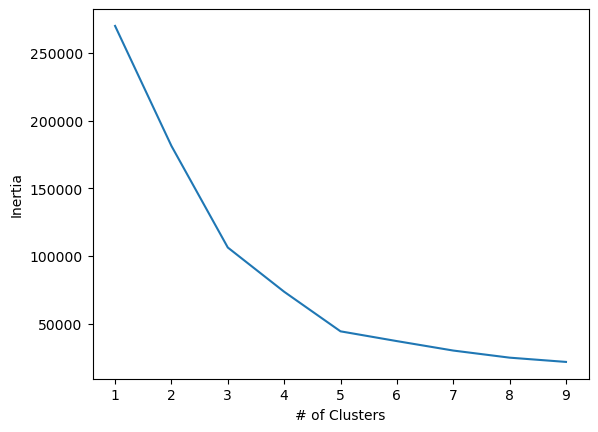

In [188]:
# Elbow method
k_range = range(1, 10)
inertia = []


for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(income_spending)
    inertia.append(kmeans.inertia_)

# Elbow Plot
sns.lineplot(x = k_range, y = inertia)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

**Optimal N. of CLusters = 5**

In [189]:
kmeans5 = KMeans(n_clusters = 5, random_state = 42).fit(income_spending)
print('Silhouette Score: ', silhouette_score(income_spending, kmeans5.labels_))

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score:  0.553931997444648


**Silhouette Score:  0.55**

In [197]:
y_preds_5 = kmeans5.predict(income_spending)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

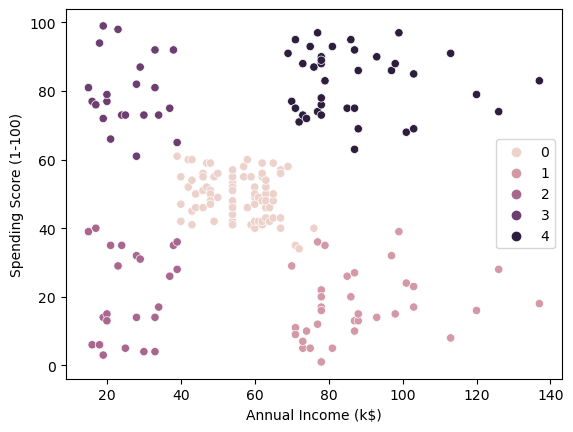

In [198]:
sns.scatterplot(income_spending, x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = y_preds_5)

Among the dataset formed of Age and Annual Income, we observe:
- **Group 0**: people with an annual income between 39 - 69k, with a spending score between 40 to 61. (**Average Buyer**)
- **Group 1**: people with an annual income between 70 - 140k, with a spending score between 0 to 40. (**High Income Savers**)
- **Group 2**: people with an annual income between 18 - 40k, with a spending score between 7 to 40. (**Low Income Savers**)
- **Group 3**: people with an annual income between 18 - 40k, with a spending score between 60 to 100. (**Low Income, High Buyer**)
- **Group 4**: people with an annual income between 70 - 140k, with a spending score between 60 to 100. (**Target Persona**)

Among the different silhouette scores, the better one seems to be **Annual Income vs Spending Score (0.55)**.

Let's use DBSCAN to check if we can get a better score.

# DBSCAN Cluster

### Annual Income vs Spending

In [199]:
from sklearn.cluster import DBSCAN

In [217]:
dbscan = DBSCAN(eps = 10, min_samples = 4).fit(income_spending)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

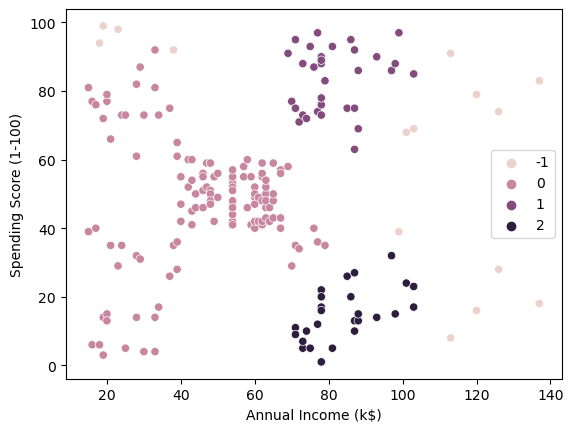

In [218]:
sns.scatterplot(data = income_spending, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = dbscan.labels_)

In [219]:
silhouette_score(income_spending, dbscan.labels_)

0.39889488555584734

**Silhouette Score: 0.39**

I've tried to perform a segmentation analysis using DBSCAN: Annual Income and Spending Score.
- With n_clusters = 4, the silhouette score is 0.39. Less compared to the K-Means one of 0.55.
- The scatter plot shows that the algorithm does not adequately fit the data.

### 3 - KMeans for segmenting based on: Age, Annual Income, and Spending Score

In [220]:
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

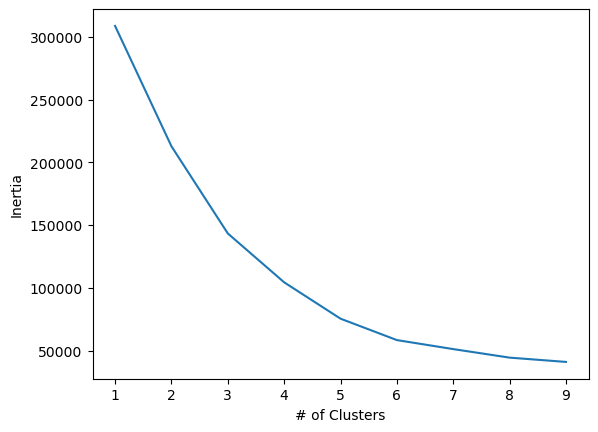

In [221]:
# Elbow method
k_range = range(1, 10)
inertia = []


for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Elbow Plot
sns.lineplot(x = k_range, y = inertia)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

The optimal N. of Clusters is not visible by this plot. I choose to go for K = 6

In [222]:
kmeans6 = KMeans(n_clusters = 6, random_state = 42)
kmeans6.fit(df)

C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danyv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [223]:
y_preds_6 = kmeans6.labels_

In [224]:
silhouette_score(df, kmeans6.labels_)

0.4523566166018854

**Silhouette Score: 0.45**

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

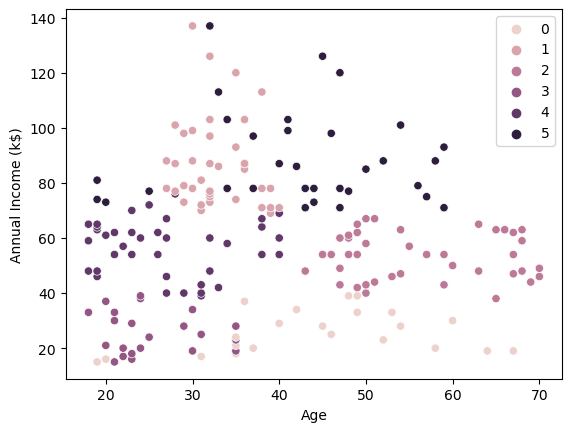

In [228]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue = y_preds_6)

### 3D PLOT

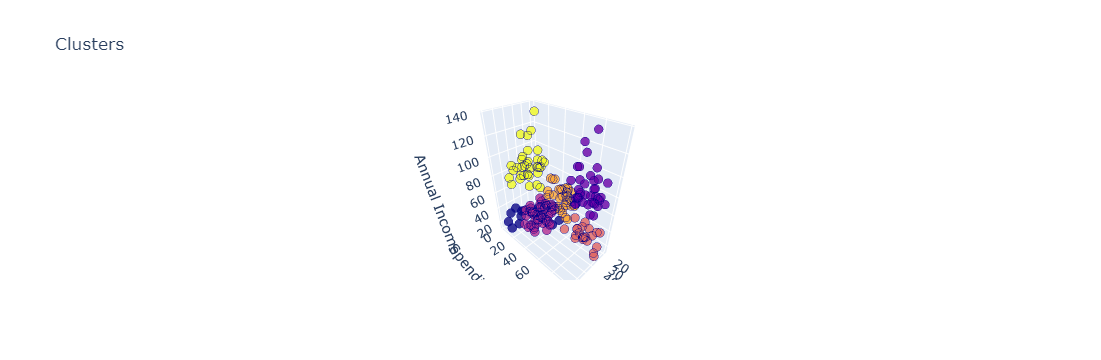

In [230]:
import plotly.graph_objs as go

# Define trace for Scatter3d plot
trace = go.Scatter3d(x = df['Age'],
                     y = df['Spending Score (1-100)'],
                     z = df['Annual Income (k$)'],
                     mode = 'markers',
                     marker = dict(size = 5,
                                  color = y_preds_6,
                                  opacity = 0.8,
                                  line = dict(
                                      color = 'darkblue',
                                      width = 1.5
                                  ))
)
data = [trace]

# Layout configuration
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income'),
    )
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
fig.show()

# Conclusion

KMeans segmentation for **Annual Income and Spending Score** is shown to be the most effective model, with significant cluster separation (silhouette score: 0.5539.

We observe 5 customer segmentations:
- **Group 0**: people with an annual income between 39 - 69k, with a spending score between 40 to 61. (**Average Buyer**)
- **Group 1**: people with an annual income between 70 - 140k, with a spending score between 0 to 40. (**High Income Savers**)
- **Group 2**: people with an annual income between 18 - 40k, with a spending score between 7 to 40. (**Low Income Savers**)
- **Group 3**: people with an annual income between 18 - 40k, with a spending score between 60 to 100. (**Low Income, High Buyer**)
- **Group 4**: people with an annual income between 70 - 140k, with a spending score between 60 to 100. (**Target Persona**)

**With this target group of customers, we can inform the marketing team to perform promotions and sales, to increase conversions.**